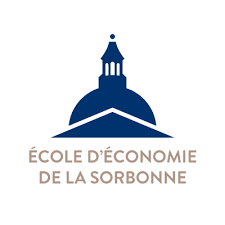

# **Asset Pricing project**

## Third application

### Student:
- #### Camilo Saldarriaga

In [1]:

# Import dependencies
import math
import numpy as np
import pandas as pd
import datetime
import scipy.stats as stats
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr

## 10 steps and 100 simulations

In [2]:
# drift coefficent
mu = 0.1
# number of steps
n = 10
# time in years
T = 0.6
# number of sims
M = 100
# initial stock price
S0 = 147
# volatility
sigma = 0.45

# initial derivative parameters
S = 147          #stock price
K = 160           #strike price
vol = sigma        #volatility (%)
r = 0.01            #risk-free rate (%)
N = n               #number of time steps


market_value = 9.95 #market price of option
T = ((datetime.date(2022,3,17)-datetime.date(2022,1,17)).days+1)/365    #time in years
print(T)

0.1643835616438356


In [3]:
# calc each time step
dt = T/n

# simulation using numpy arrays
St = np.exp(
    (mu - sigma ** 2 / 2) * dt
    + sigma * np.random.normal(0, np.sqrt(dt), size=(M,n)).T
)

# include array of 1's
St = np.vstack([np.ones(M), St])

# multiply through by S0 and return the cumulative product of elements along a given simulation path (axis=0).
St = S0 * St.cumprod(axis=0)

In [4]:

# Define time interval correctly
time = np.linspace(0,T,n+1)

# Require numpy array that is the same shape as St
tt = np.full(shape=(M,n+1), fill_value=time).T

Text(0, 0.5, 'Stock Price $(S_t)$')

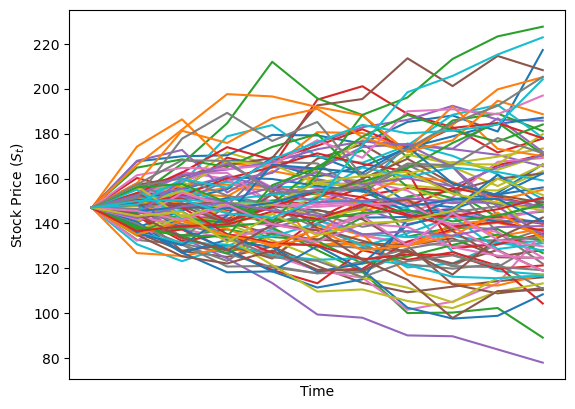

In [5]:
plt.plot(tt, St)
plt.xlabel("Time")
plt.tick_params(labelbottom = False, bottom = False) 
plt.ylabel("Stock Price $(S_t)$")


In [6]:
#precompute constants
N = 1
dt = T/N
nudt = (r - 0.5*vol**2)*dt
volsdt = vol*np.sqrt(dt)
lnS = np.log(S)

# Monte Carlo Method
Z = np.random.normal(size=(N, M))
delta_lnSt = nudt + volsdt*Z
lnSt = lnS + np.cumsum(delta_lnSt, axis=0)
lnSt = np.concatenate( (np.full(shape=(1, M), fill_value=lnS), lnSt ) )

# Compute Expectation and SE
ST = np.exp(lnSt)
CT = np.maximum(0, ST - K)
C0 = np.exp(-r*T)*np.sum(CT[-1])/M

sigma = np.sqrt( np.sum( (CT[-1] - C0)**2) / (M-1) )
SE = sigma/np.sqrt(M)

print("Call value is ${0} with SE +/- {1}".format(np.round(C0,2),np.round(SE,2)))

Call value is $4.63 with SE +/- 1.05


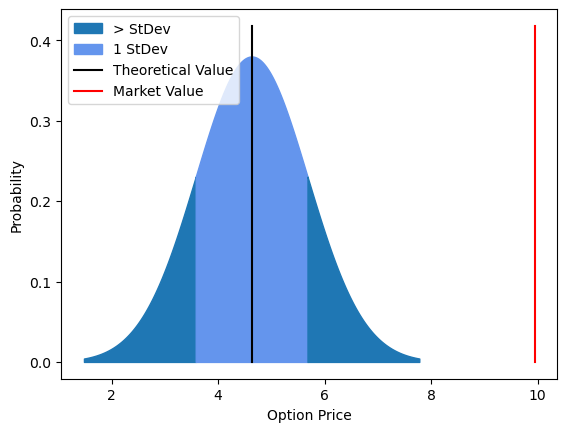

In [7]:

x1 = np.linspace(C0-3*SE, C0-1*SE, 100)
x2 = np.linspace(C0-1*SE, C0+1*SE, 100)
x3 = np.linspace(C0+1*SE, C0+3*SE, 100)

s1 = stats.norm.pdf(x1, C0, SE)
s2 = stats.norm.pdf(x2, C0, SE)
s3 = stats.norm.pdf(x3, C0, SE)

plt.fill_between(x1, s1, color='tab:blue',label='> StDev')
plt.fill_between(x2, s2, color='cornflowerblue',label='1 StDev')
plt.fill_between(x3, s3, color='tab:blue')

plt.plot([C0,C0],[0, max(s2)*1.1], 'k',
        label='Theoretical Value')
plt.plot([market_value,market_value],[0, max(s2)*1.1], 'r',
        label='Market Value')

plt.ylabel("Probability")
plt.xlabel("Option Price")
plt.legend()
plt.show()

## 100 steps and 100 simulations

In [8]:
# drift coefficent
mu = 0.1
# number of steps
n = 100
# time in years
T = 0.6
# number of sims
M = 100
# initial stock price
S0 = 147
# volatility
sigma = 0.45

# initial derivative parameters
S = 147          #stock price
K = 160           #strike price
vol = sigma        #volatility (%)
r = 0.01            #risk-free rate (%)
N = n               #number of time steps


market_value = 9.95 #market price of option
T = ((datetime.date(2022,3,17)-datetime.date(2022,1,17)).days+1)/365    #time in years
print(T)

0.1643835616438356


In [9]:
# calc each time step
dt = T/n

# simulation using numpy arrays
St = np.exp(
    (mu - sigma ** 2 / 2) * dt
    + sigma * np.random.normal(0, np.sqrt(dt), size=(M,n)).T
)

# include array of 1's
St = np.vstack([np.ones(M), St])

# multiply through by S0 and return the cumulative product of elements along a given simulation path (axis=0).
St = S0 * St.cumprod(axis=0)

In [10]:

# Define time interval correctly
time = np.linspace(0,T,n+1)

# Require numpy array that is the same shape as St
tt = np.full(shape=(M,n+1), fill_value=time).T

Text(0, 0.5, 'Stock Price $(S_t)$')

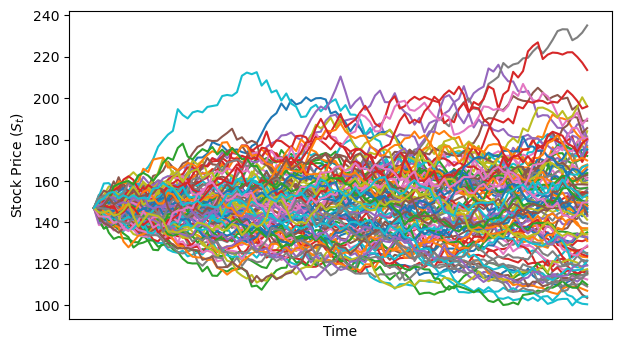

In [11]:
plt.figure(figsize=(7,4))
plt.plot(tt, St)
plt.xlabel("Time")
plt.tick_params(labelbottom = False, bottom = False) 
plt.ylabel("Stock Price $(S_t)$")


In [12]:
#precompute constants
N = 1
dt = T/N
nudt = (r - 0.5*vol**2)*dt
volsdt = vol*np.sqrt(dt)
lnS = np.log(S)

# Monte Carlo Method
Z = np.random.normal(size=(N, M))
delta_lnSt = nudt + volsdt*Z
lnSt = lnS + np.cumsum(delta_lnSt, axis=0)
lnSt = np.concatenate( (np.full(shape=(1, M), fill_value=lnS), lnSt ) )

# Compute Expectation and SE
ST = np.exp(lnSt)
CT = np.maximum(0, ST - K)
C0 = np.exp(-r*T)*np.sum(CT[-1])/M

sigma = np.sqrt( np.sum( (CT[-1] - C0)**2) / (M-1) )
SE = sigma/np.sqrt(M)

print("Call value is ${0} with SE +/- {1}".format(np.round(C0,2),np.round(SE,2)))

Call value is $4.08 with SE +/- 1.22


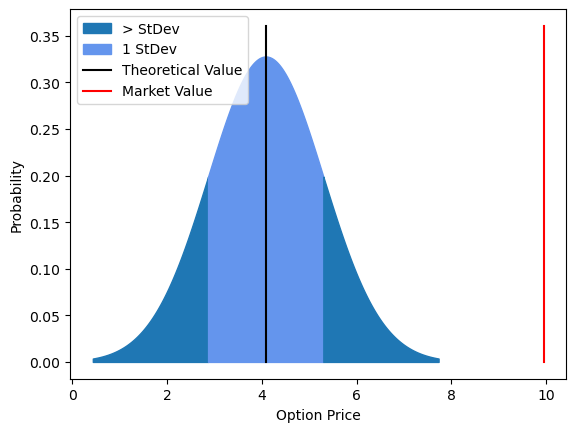

In [13]:

x1 = np.linspace(C0-3*SE, C0-1*SE, 100)
x2 = np.linspace(C0-1*SE, C0+1*SE, 100)
x3 = np.linspace(C0+1*SE, C0+3*SE, 100)

s1 = stats.norm.pdf(x1, C0, SE)
s2 = stats.norm.pdf(x2, C0, SE)
s3 = stats.norm.pdf(x3, C0, SE)

plt.fill_between(x1, s1, color='tab:blue',label='> StDev')
plt.fill_between(x2, s2, color='cornflowerblue',label='1 StDev')
plt.fill_between(x3, s3, color='tab:blue')

plt.plot([C0,C0],[0, max(s2)*1.1], 'k',
        label='Theoretical Value')
plt.plot([market_value,market_value],[0, max(s2)*1.1], 'r',
        label='Market Value')

plt.ylabel("Probability")
plt.xlabel("Option Price")
plt.legend()
plt.show()

## 10 steps and 1000 simulations

In [14]:
# drift coefficent
mu = 0.1
# number of steps
n = 10
# time in years
T = 0.6
# number of sims
M = 1000
# initial stock price
S0 = 147
# volatility
sigma = 0.45

# initial derivative parameters
S = 147          #stock price
K = 160          #strike price
vol = sigma        #volatility (%)
r = 0.01            #risk-free rate (%)
N = n               #number of time steps


market_value = 9.95 #market price of option
T = ((datetime.date(2022,3,17)-datetime.date(2022,1,17)).days+1)/365    #time in years
print(T)

0.1643835616438356


In [15]:
# calc each time step
dt = T/n

# simulation using numpy arrays
St = np.exp(
    (mu - sigma ** 2 / 2) * dt
    + sigma * np.random.normal(0, np.sqrt(dt), size=(M,n)).T
)

# include array of 1's
St = np.vstack([np.ones(M), St])

# multiply through by S0 and return the cumulative product of elements along a given simulation path (axis=0).
St = S0 * St.cumprod(axis=0)

In [16]:

# Define time interval correctly
time = np.linspace(0,T,n+1)

# Require numpy array that is the same shape as St
tt = np.full(shape=(M,n+1), fill_value=time).T

Text(0, 0.5, 'Stock Price $(S_t)$')

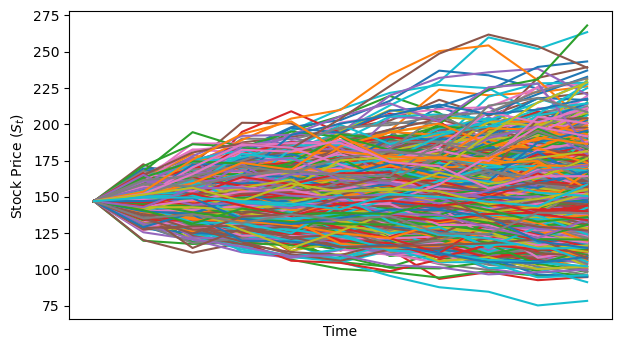

In [17]:
plt.figure(figsize=(7,4))
plt.plot(tt, St)
plt.xlabel("Time")
plt.tick_params(labelbottom = False, bottom = False) 
plt.ylabel("Stock Price $(S_t)$")

In [18]:
#precompute constants
N = 1
dt = T/N
nudt = (r - 0.5*vol**2)*dt
volsdt = vol*np.sqrt(dt)
lnS = np.log(S)

# Monte Carlo Method
Z = np.random.normal(size=(N, M))
delta_lnSt = nudt + volsdt*Z
lnSt = lnS + np.cumsum(delta_lnSt, axis=0)
lnSt = np.concatenate( (np.full(shape=(1, M), fill_value=lnS), lnSt ) )

# Compute Expectation and SE
ST = np.exp(lnSt)
CT = np.maximum(0, ST - K)
C0 = np.exp(-r*T)*np.sum(CT[-1])/M

sigma = np.sqrt( np.sum( (CT[-1] - C0)**2) / (M-1) )
SE = sigma/np.sqrt(M)

print("Call value is ${0} with SE +/- {1}".format(np.round(C0,2),np.round(SE,2)))

Call value is $5.99 with SE +/- 0.42


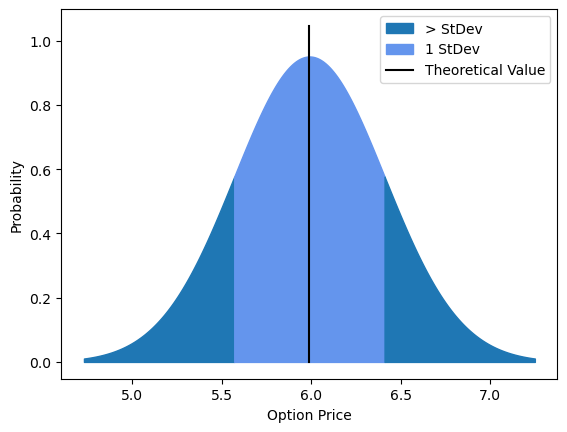

In [19]:

x1 = np.linspace(C0-3*SE, C0-1*SE, 100)
x2 = np.linspace(C0-1*SE, C0+1*SE, 100)
x3 = np.linspace(C0+1*SE, C0+3*SE, 100)

s1 = stats.norm.pdf(x1, C0, SE)
s2 = stats.norm.pdf(x2, C0, SE)
s3 = stats.norm.pdf(x3, C0, SE)

plt.fill_between(x1, s1, color='tab:blue',label='> StDev')
plt.fill_between(x2, s2, color='cornflowerblue',label='1 StDev')
plt.fill_between(x3, s3, color='tab:blue')

plt.plot([C0,C0],[0, max(s2)*1.1], 'k',
        label='Theoretical Value')

plt.ylabel("Probability")
plt.xlabel("Option Price")
plt.legend()
plt.show()

I want to evaluate the behavior of the price given changes on the number of simulations. For that I run the process using a range of simulations between 10 and 5000, while holding all the factors constant

In [32]:
list = range(10, 10000)
sims_df = pd.DataFrame()
row1 = pd.DataFrame()

sims_df["Simulations"] = []
sims_df["Option price"] = []

row1["Simulations"] = []
row1["Option price"] = []

In [33]:
for w in list:
    # drift coefficent
    mu = 0.1
    # number of steps
    n = 10
    # time in years
    T = 0.6
    # number of sims
    M = w
    # initial stock price
    S0 = 147
    # volatility
    sigma = 0.45

    # initial derivative parameters
    S = 147          #stock price
    K = 160         #strike price
    vol = sigma        #volatility (%)
    r = 0.01            #risk-free rate (%)
    N = n               #number of time steps

    market_value = 9.95 #market price of option
    T = ((datetime.date(2022,3,17)-datetime.date(2022,1,17)).days+1)/365    #time in years
    
    #precompute constants
    N = 1
    dt = T/N
    nudt = (r - 0.5*vol**2)*dt
    volsdt = vol*np.sqrt(dt)
    lnS = np.log(S)

    # Monte Carlo Method
    Z = np.random.normal(size=(N, M))
    delta_lnSt = nudt + volsdt*Z
    lnSt = lnS + np.cumsum(delta_lnSt, axis=0)
    lnSt = np.concatenate( (np.full(shape=(1, M), fill_value=lnS), lnSt ) )

    # Compute Expectation and SE
    ST = np.exp(lnSt)
    CT = np.maximum(0, ST - K)
    C0 = np.exp(-r*T)*np.sum(CT[-1])/M

    sigma = np.sqrt( np.sum( (CT[-1] - C0)**2) / (M-1) )
    SE = sigma/np.sqrt(M)

    row1["Simulations"] = [w]
    row1["Option price"] = [np.round(C0,5)]
    sims_df =   pd.concat([sims_df, row1])

Text(0, 0.5, 'Option price')

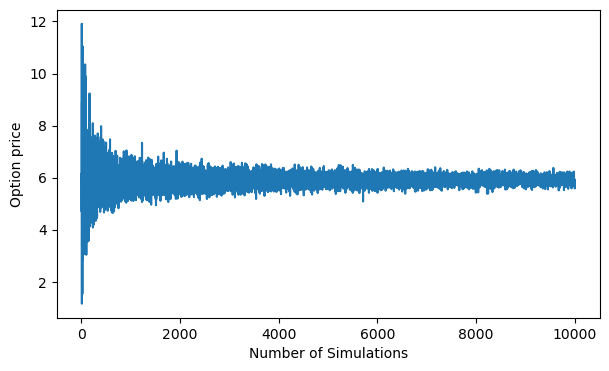

In [34]:
plt.figure(figsize=(7,4))
plt.plot(sims_df["Simulations"], sims_df["Option price"])
plt.xlabel("Number of Simulations")
plt.ylabel("Option price")

I want to evaluate the behavior of the price given changes on the volatility. For that I run the process using a range of years volatility between 

In [35]:
list1 = [x / 100.0 for x in range(1, 100)]
vol_df = pd.DataFrame()
row1 = pd.DataFrame()

vol_df["Volatility"] = []
vol_df["Option price"] = []

row1["Volatility"] = []
row1["Option price"] = []

In [36]:
for w in list1:
    # drift coefficent
    mu = 0.1
    # number of steps
    n = 100
    # time in years
    T = 0.6
    # number of sims
    M = 100000
    # initial stock price
    S0 = 147
    # volatility
    sigma = w

    # initial derivative parameters
    S = 147          #stock price
    K = 160         #strike price
    vol = sigma        #volatility (%)
    r = 0.01            #risk-free rate (%)
    N = n               #number of time steps

    market_value = 9.95 #market price of option
    T = ((datetime.date(2022,3,17)-datetime.date(2022,1,17)).days+1)/365    #time in years
    
    #precompute constants
    N = 1
    dt = T/N
    nudt = (r - 0.5*vol**2)*dt
    volsdt = vol*np.sqrt(dt)
    lnS = np.log(S)

    # Monte Carlo Method
    Z = np.random.normal(size=(N, M))
    delta_lnSt = nudt + volsdt*Z
    lnSt = lnS + np.cumsum(delta_lnSt, axis=0)
    lnSt = np.concatenate( (np.full(shape=(1, M), fill_value=lnS), lnSt ) )

    # Compute Expectation and SE
    ST = np.exp(lnSt)
    CT = np.maximum(0, ST - K)
    C0 = np.exp(-r*T)*np.sum(CT[-1])/M

    sigma = np.sqrt( np.sum( (CT[-1] - C0)**2) / (M-1) )
    SE = sigma/np.sqrt(M)

    row1["Volatility"] = [w]
    row1["Option price"] = [np.round(C0,5)]
    vol_df =   pd.concat([vol_df, row1])

Text(0, 0.5, 'Option price')

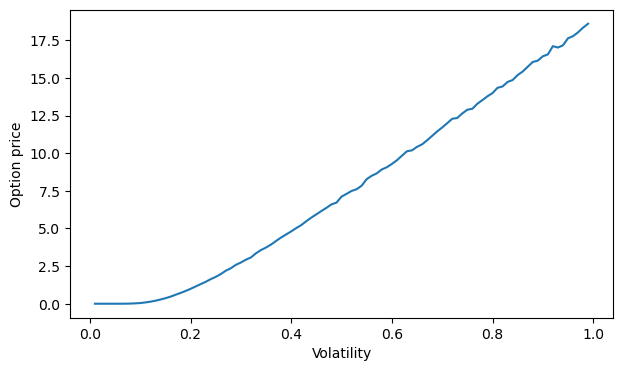

In [37]:
plt.figure(figsize=(7,4))
plt.plot(vol_df["Volatility"], vol_df["Option price"])
plt.xlabel("Volatility")
plt.ylabel("Option price")